# TSP
### Auxiliary functions

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

params = {
            'animation.html' : 'jshtml',
            'figure.figsize' : (16, 9),
            'legend.fontsize': 'x-large',
            'axes.labelsize': 'x-large',
            'axes.titlesize':'x-large',
            'xtick.labelsize':'x-large',
            'ytick.labelsize':'x-large',
            'animation.embed_limit': '100'
         }
plt.rcParams.update(params)

def distance(point_a, point_b):
    (x1, y1) = point_a
    (x2, y2) = point_b

    return math.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)

def cost_function(path):
    dist = distance(path[0], path[len(path) - 1])
    for i in range(len(path) - 1):
        point_a = path[i]
        point_b = path[i + 1]

        dist += distance(point_a, point_b)

    return dist

def rand_uniq_tuple(n):
    if n < 2:
        raise Exception("Sth went wrong")

    s = np.random.randint(0, n)
    t = np.random.randint(0, n)
    while s == t:
        t = np.random.randint(0, n)

    return s, t
    
def reverse(path, s, t):
    n = len(path)
    if s < t:
        while s < t:
            path[s], path[t] = path[t], path[s]
            s = (s + 1) % n
            t = (t - 1) % n
    elif s > t:
        while s > t:
            path[s], path[t] = path[t], path[s]
            s = (s + 1) % n
            t = (t - 1) % n

def consecutive_swap(path):
    n = len(path)
    s = np.random.randint(0, n)
    t = (s + 1) % n

    reverse(path, s, t)

def arbitrary_swap(path):
    n = len(path)
    s, t = rand_uniq_tuple(n)

    reverse(path, s, t)

def exponential_decay_v9(temperature):
    return .9 * temperature

def exponential_decay_v5(temperature):
    return .5 * temperature

## Simulated annealing

In [3]:
def tsp_simuated_annealing(path, temperature, tempF, neighF, breakAfter = 10, tempLimit = 1e-6, gather_data = False):
    epochs = len(path) * 100
    cost   = cost_function(path)
    moves  = 0

    paths, temperatures, costs = [], [], []

    while True:
        found = 0
        for i in range(epochs):
            moves += 1
            alternate_path = path.copy()
            neighF(alternate_path)
            alternate_cost = cost_function(alternate_path)
            delta = cost - alternate_cost

            if delta > 0 or (math.e ** (delta / temperature)) > np.random.rand():
                cost = alternate_cost
                path = alternate_path
            if delta > 0:
                found += 1
                if found > breakAfter:
                    break

        if gather_data:
            paths.append(path)
            temperatures.append(temperature)
            costs.append(cost)
        
        if found == 0 or temperature < tempLimit:
            break

        temperature = tempF(temperature)

    if gather_data: 
        data = (paths, temperatures, costs)
        return path, moves, data
    else:
        return path, moves

### Visualization functions 

In [4]:
import matplotlib.animation as animation
from IPython.display import HTML

def draw_solution(path, moves):
    xs = [x for (x, y) in path]
    ys = [y for (x, y) in path]

    fig, ax = plt.subplots()
    plt.plot(xs, ys, "o")
        
    xs.append(path[0][0])
    ys.append(path[0][1])
    plt.plot(xs, ys)

    cost = cost_function(path)
    label = f'Cost: {cost} achieved with {moves} moves'
    ax.set_title(label, fontsize = 20)
    plt.show()

def visualize(paths, temperatures, costs):
    fig, ax = plt.subplots()
    plt.close(fig)
    n = len(temperatures)
    
    def animate(i):
        draw_ax(paths[i], temperatures[i], costs[i])

    def draw_ax(path, temperature, cost):
        xs = [x for (x, y) in path]
        ys = [y for (x, y) in path]

        ax.clear()
        ax.plot(xs, ys, "o")
        
        xs.append(path[0][0])
        ys.append(path[0][1])
        ax.plot(xs, ys)

        label = f'Temperature: {temperature}\nCost: {cost}'
        ax.set_title(label, fontsize = 20)
    
    return animation.FuncAnimation(fig, animate, interval = 75, frames = n)

In [5]:
def solve(points, temperature = 100.0, tempF = exponential_decay_v9, neighF = arbitrary_swap, breakAfter = 10, tempLimit = 1e-4, animate = False):
    if animate:
        found, moves, data = tsp_simuated_annealing(points, temperature, tempF, neighF, breakAfter, tempLimit = tempLimit, gather_data = True)
        return visualize(*data)
    else:
        found, moves = tsp_simuated_annealing(points, temperature, tempF, neighF)
        draw_solution(found, moves)


### Functions generating points

In [6]:
# Generates n radnom points uniformly on 2D plane: [0, 1] x [0, 1]
def generate_random(n, bottom_x = 0.0, bottom_y = 0.0, upper_x = 1.0, upper_y = 1.0):
    points = set()
    while len(points) < n:
        point = np.random.uniform(low = bottom_x, high = upper_x), np.random.uniform(low = bottom_y, high = upper_y)
        points.add(point)
    
    return list(points)

def normal_distibution_2d(n, mean = [0.0, 0.0], cov = [[1.0, 0.0], [0.0, 1.0]]):
    points = []
    for i in range(n):
        arr = np.random.multivariate_normal(mean, cov)
        point = (arr[0], arr[1])
        points.append(point)

    return points

def normal_distribution_with_4_set_of_params(n = 10):
    points = normal_distibution_2d(n)

    mean2 = [10.0, 2.0]
    cov2 = [[1.0, 0.0],
            [0.0, 1.0]]

    points += normal_distibution_2d(n, mean2, cov2)

    mean3 = [-10.0, -10.0]
    cov3 = [[1.0, 0.0],
            [0.0, 1.0]]

    points += normal_distibution_2d(n, mean3, cov3)

    mean4 = [20.0, 0]
    cov4 = [[1.0, 1.0],
            [0.0, 1.0]]

    points += normal_distibution_2d(n, mean4, cov4)

    return points

def nine_separated_sets(n, lower_lim = 0, upper_lim = 12):
    points = []
    rect_set = set()
    for i in range(9):
        lower = np.random.randint(lower_lim, upper_lim), np.random.randint(lower_lim, upper_lim)
        while lower in rect_set:
            lower = np.random.randint(lower_lim, upper_lim), np.random.randint(lower_lim, upper_lim)
        
        rect_set.add(lower)
        upper = lower[0] + 1, lower[1] + 1

        points += generate_random(n, *lower, *upper)

    return points

## Uniformly generated points on \[0, 1\] x \[0, 1\]
- 10 points
- 50 points
- 250 points

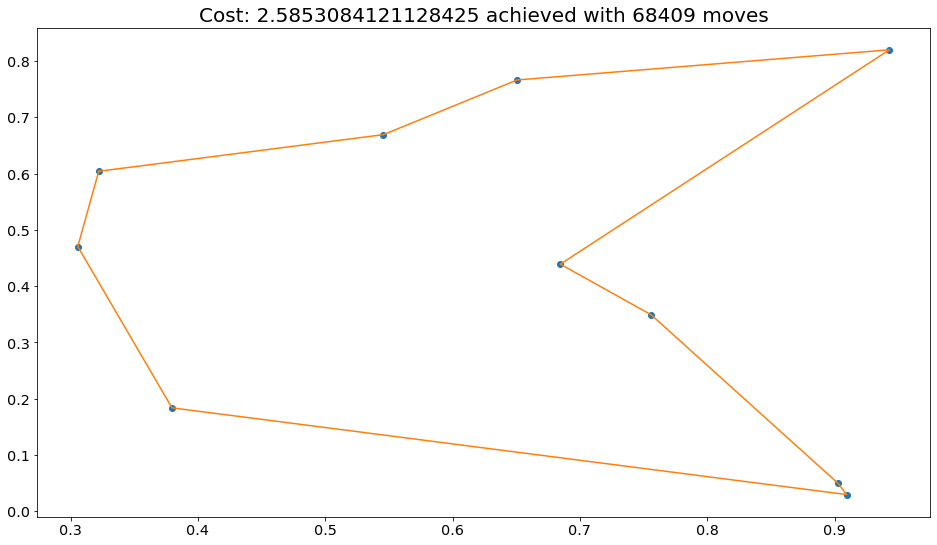

In [24]:
points = generate_random(10)
solve(points)

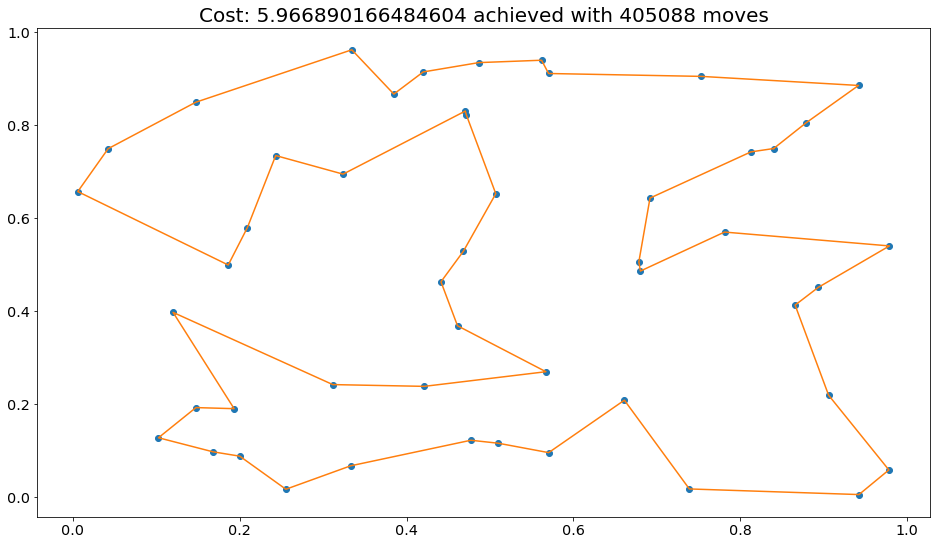

In [25]:
points = generate_random(50)
solve(points)

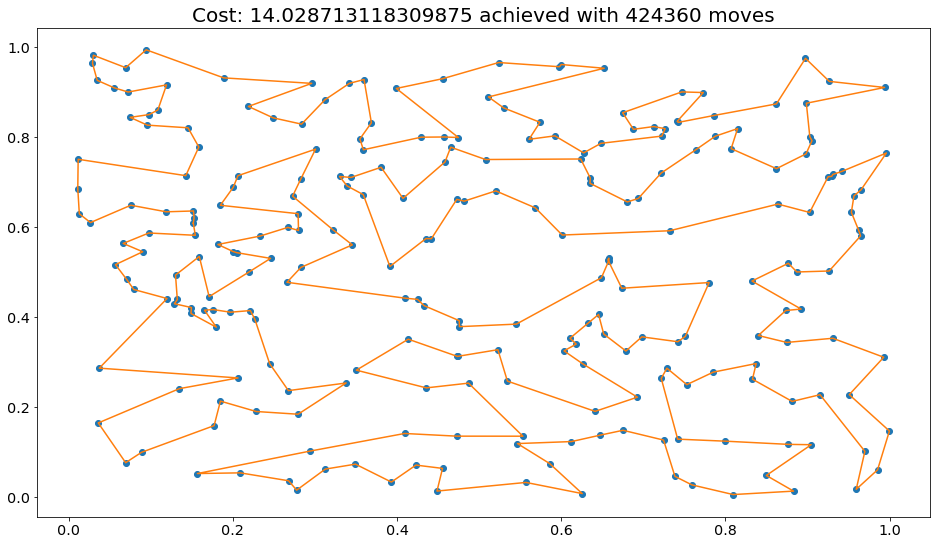

In [26]:
points = generate_random(250)
solve(points)

## Normal distribution 
- Set of points consists of 4 smaller sets which are 
  sampled from 2d normal distribution
- Each one of them uses different mean and covariance

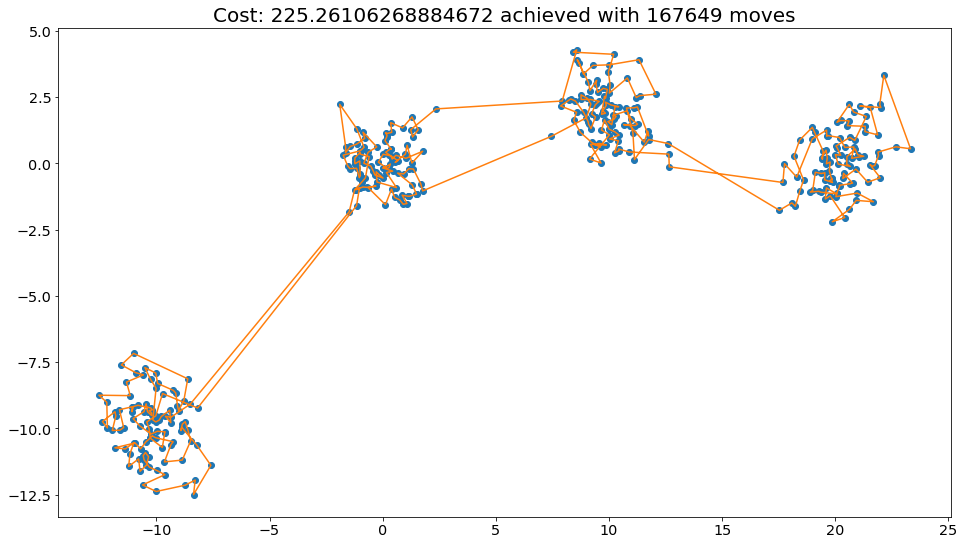

In [27]:
points = normal_distribution_with_4_set_of_params(100)
solve(points, tempLimit = 1e-7)

## Uniform distribution of 100 points


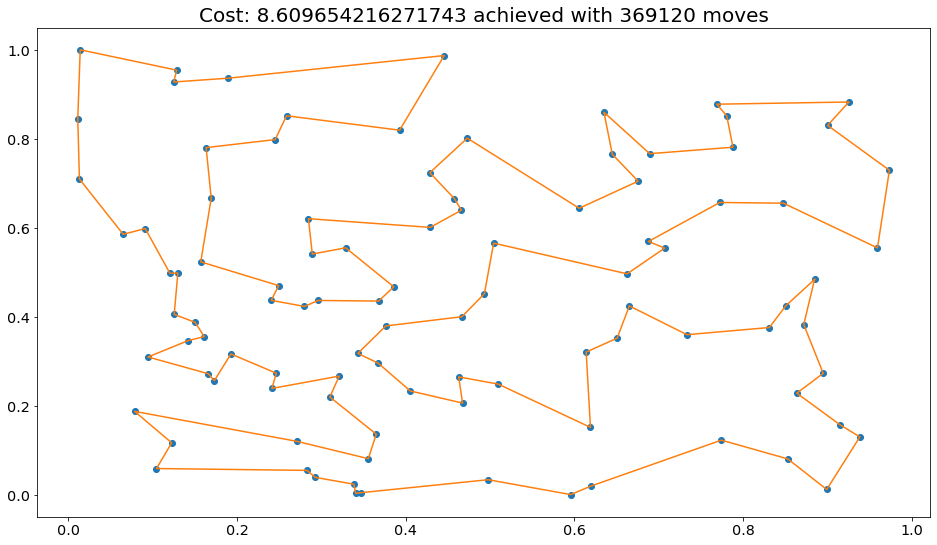

In [33]:
points = generate_random(100)
solve(points) 

## 9 separated sets 

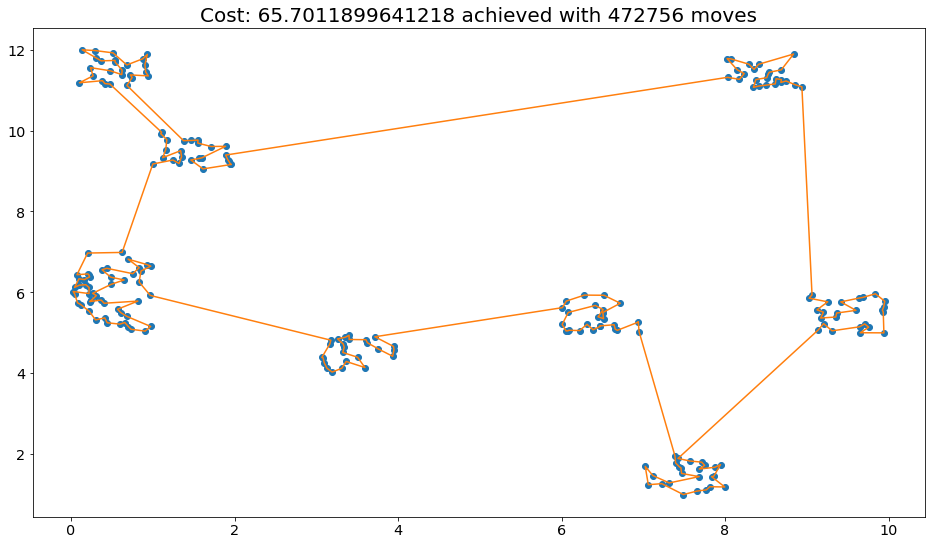

In [32]:
points = nine_separated_sets(25)
solve(points)

## Testing how convergence depends on neighbour function

In [34]:
points = generate_random(50)

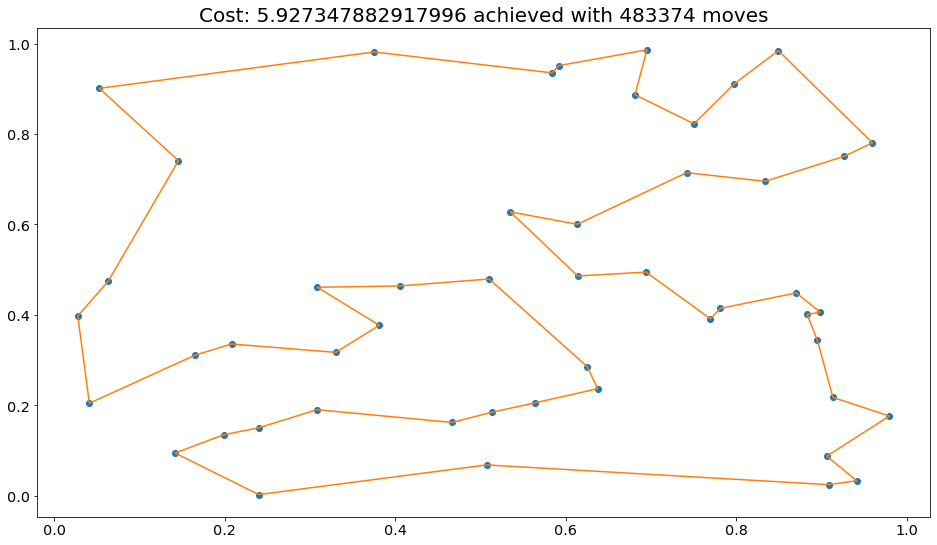

In [35]:
solve(points, neighF=arbitrary_swap)

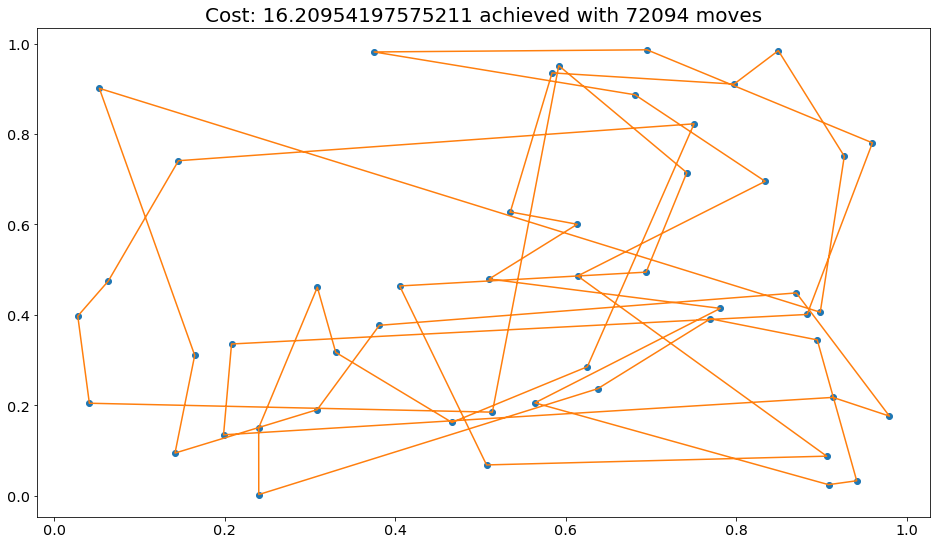

In [40]:
solve(points, neighF=consecutive_swap, temperature=1000)

## Testing how converge depends on `cooling` function

In [41]:
points = generate_random(50)

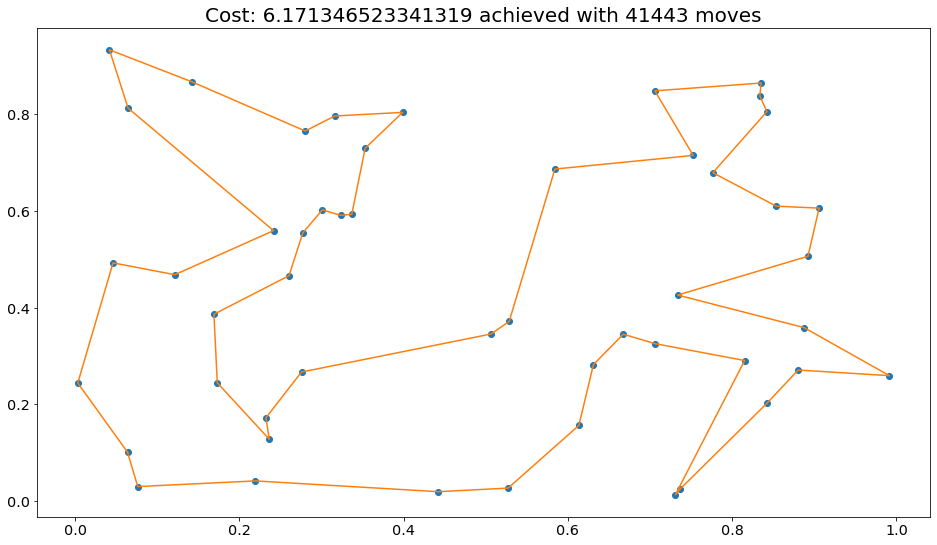

In [42]:
solve(points, tempF=exponential_decay_v5)

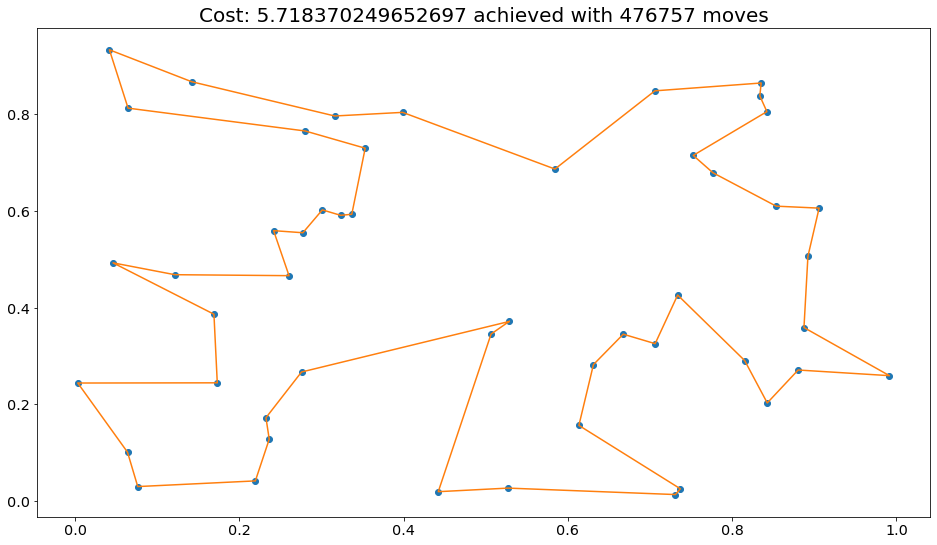

In [43]:
solve(points, tempF=exponential_decay_v9)

## Visualization

- to see animation set animate = True when calling solve
- note that the default cooling function is set to exponential_decay_v9 which is realtively slow
  so solving might take quite a long time but resulting animation should be pleasing
- we can set tempF to exponential_decay_v5 to quickly solve given set of points
- Run cells bellow

In [9]:
points = generate_random(100)
solve(points, animate=True, tempF=exponential_decay_v9)

In [10]:
points = nine_separated_sets(10)
solve(points, animate=True)